<a href="https://colab.research.google.com/github/LoolzMe/MachineLearning/blob/main/AIMLfC2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tensorflow
!pip install numpy
!pip install urllib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement urllib (from versions: none)
ERROR: No matching distribution found for urllib


In [ ]:
"""It's legacy; It's already supported within tensorflow framework"""

# import urllib.request as request
# import zipfile

# training_url = "https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip"
# validation_url = "https://storage.googleapis.com/laurencemoroney-blog.appspot.com/validation-horse-or-human.zip"

# tr_file_name = "horse-or-human.zip"
# vl_file_name = "validation-horse-or-human.zip"
# training_dir = "horse-or-human/training/"
# validation_dir = "horse-or-human/validation/"


"It's legacy; It's already supported within tensorflow framework"

In [ ]:
"""This is too"""

# request.urlretrieve(training_url, tr_file_name)
# request.urlretrieve(validation_url, vl_file_name)

# tr_zip_handle = zipfile.ZipFile(tr_file_name, 'r')
# vl_zip_handle = zipfile.ZipFile(vl_file_name, 'r')

# tr_zip_handle.extractall(training_dir)
# vl_zip_handle.extractall(validation_dir)

'This is too'

In [ ]:
import tensorflow as tf
import tensorflow_datasets as tfds
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras import layers
# import tensorflow_probability as tfp

print(tf.__version__)

2.9.2


In [ ]:
(train_ds, test_ds) = tfds.load('horses_or_humans', split=['train', 'test'], shuffle_files=True, as_supervised=True)

# train_ds = train_ds.shuffle(1024).batch(4).prefetch(tf.data.AUTOTUNE)


In [ ]:
itr = iter(train_ds)

tf.Tensor(1, shape=(), dtype=int64)


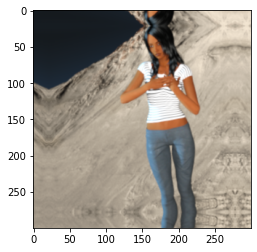

In [ ]:
image, label = next(itr)
plt.imshow(image[0])
print(label[0])

In [ ]:
IMG_SIZE = 300

resize_and_rescale = tf.keras.Sequential([
  layers.Resizing(IMG_SIZE, IMG_SIZE),
  layers.Rescaling(1./255)
])

data_augmentation = tf.keras.Sequential([
  layers.RandomFlip("horizontal"),
  layers.RandomRotation(0.1),
  layers.RandomZoom(0.2)
])



In [ ]:
batch_size = 4
AUTOTUNE = tf.data.AUTOTUNE

def prepare(ds, shuffle=False, augment=False):
  # Resize and rescale all datasets.
  ds = ds.map(lambda x, y: (resize_and_rescale(x), y), num_parallel_calls=AUTOTUNE)

  if shuffle:
    ds = ds.shuffle(1000)

  # Batch all datasets.
  ds = ds.batch(batch_size)

  # Use data augmentation only on the training set.
  if augment:
    ds = ds.map(lambda x, y: (data_augmentation(x, training=True), y), num_parallel_calls=AUTOTUNE)

  # Use buffered prefetching on all datasets.
  return ds.prefetch(buffer_size=AUTOTUNE)


In [ ]:
train_ds = prepare(train_ds, shuffle=True)
test_ds = prepare(test_ds)

In [ ]:
model = Sequential([
    data_augmentation,
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(300, 300, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.RMSprop(), metrics=['accuracy'])

In [ ]:
model.fit(train_ds, epochs=10)

Epoch 1/10
 32/257 [==>...........................] - ETA: 2:46 - loss: 0.2529 - accuracy: 0.9453

KeyboardInterrupt: ignored

In [ ]:
model.evaluate(test_ds)

64/64 [==============================] - 7s 113ms/step - loss: 5.7703 - accuracy: 0.7891


[5.770270347595215, 0.7890625]